<a href="https://colab.research.google.com/github/hjchoi00/AI_lab/blob/main/LAB_Audio_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# week2

In [109]:
try:
    import torch
    print("✓ PyTorch is successfully imported!")
    print(f"PyTorch version: {torch.__version__}")

    # Check if CUDA is available
    if torch.cuda.is_available():
        device = torch.device('cuda')
        print(f"✓ CUDA is available! Device count: {torch.cuda.device_count()}")
        print(f"Current CUDA device: {torch.cuda.get_device_name(0)}")
    else:
        print("CUDA is not available. Using CPU.")

    # Create a simple tensor to test basic functionality
    test_tensor = torch.tensor([1, 2, 3, 4, 5], device=device)
    print(f"✓ Test tensor created: {test_tensor}")
    print(f"Tensor shape: {test_tensor.shape}")
    print(f"Tensor device: {test_tensor.device}")  # cuda:0 나옴

    squared_tensor = test_tensor ** 2
    print(f"✓ Basic operation test (squaring): {squared_tensor}")

    print("\n🎉 PyTorch is working correctly!")

except ImportError as e:
    print("❌ PyTorch is not installed or not available")
    print(f"Error details: {e}")
    print("Please install PyTorch using: pip install torch")

except Exception as e:
    print(f"❌ An error occurred while testing PyTorch: {e}")


✓ PyTorch is successfully imported!
PyTorch version: 2.8.0+cu126
✓ CUDA is available! Device count: 1
Current CUDA device: Tesla T4
✓ Test tensor created: tensor([1, 2, 3, 4, 5], device='cuda:0')
Tensor shape: torch.Size([5])
Tensor device: cuda:0
✓ Basic operation test (squaring): tensor([ 1,  4,  9, 16, 25], device='cuda:0')

🎉 PyTorch is working correctly!


# Pytorch Audio Input/Output 실행하기
https://docs.pytorch.org/audio/stable/tutorials/audio_io_tutorial.html

In [110]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

2.8.0+cu126
2.8.0+cu126


In [111]:
!pip install boto3

In [112]:
import io
import os
import tarfile
import tempfile

import boto3
import matplotlib.pyplot as plt
import requests
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset

SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")


def _hide_seek(obj):
    class _wrapper:
        def __init__(self, obj):
            self.obj = obj

        def read(self, n):
            return self.obj.read(n)

    return _wrapper(obj)

/tmp/ipython-input-2415713283.py:14: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
/tmp/ipython-input-2415713283.py:15: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
/tmp/ipython-input-2415713283.py:16: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a

In [113]:
metadata = torchaudio.info(SAMPLE_WAV)
print(metadata)

AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)


/tmp/ipython-input-3458049858.py:1: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  metadata = torchaudio.info(SAMPLE_WAV)
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:20: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  s = torcha

In [114]:
metadata = torchaudio.info(SAMPLE_GSM)
print(metadata)

AudioMetaData(sample_rate=8000, num_frames=39680, num_channels=1, bits_per_sample=0, encoding=GSM)


/tmp/ipython-input-1056785358.py:1: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  metadata = torchaudio.info(SAMPLE_GSM)


In [115]:
url = "https://download.pytorch.org/torchaudio/tutorial-assets/steam-train-whistle-daniel_simon.wav"
with requests.get(url, stream=True) as response:
    metadata = torchaudio.info(_hide_seek(response.raw))
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=109368, num_channels=2, bits_per_sample=16, encoding=PCM_S)


/tmp/ipython-input-1270968320.py:3: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  metadata = torchaudio.info(_hide_seek(response.raw))


In [116]:
waveform, sample_rate = torchaudio.load(SAMPLE_WAV)

In [117]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

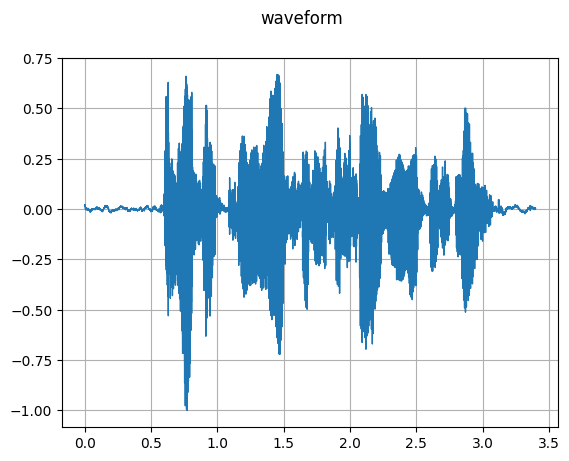

In [118]:
plot_waveform(waveform, sample_rate)

In [119]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

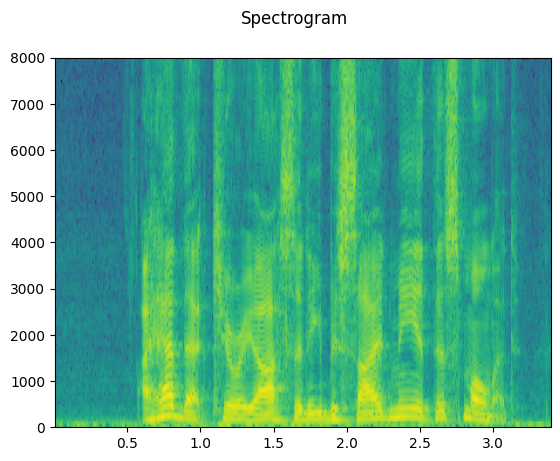

In [120]:
plot_specgram(waveform, sample_rate)

In [121]:
Audio(waveform.numpy()[0], rate=sample_rate)

# Pytorch Audio resampling 실행
https://docs.pytorch.org/audio/stable/tutorials/audio_resampling_tutorial.html

## Preparation

In [122]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

2.8.0+cu126
2.8.0+cu126


In [123]:
!pip -q install resampy

In [124]:
import math
import timeit

import librosa
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import resampy
from IPython.display import Audio

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

DEFAULT_OFFSET = 201


def _get_log_freq(sample_rate, max_sweep_rate, offset):
    """Get freqs evenly spaced out in log-scale, between [0, max_sweep_rate // 2]

    offset is used to avoid negative infinity `log(offset + x)`.

    """
    start, stop = math.log(offset), math.log(offset + max_sweep_rate // 2)
    return torch.exp(torch.linspace(start, stop, sample_rate, dtype=torch.double)) - offset


def _get_inverse_log_freq(freq, sample_rate, offset):
    """Find the time where the given frequency is given by _get_log_freq"""
    half = sample_rate // 2
    return sample_rate * (math.log(1 + freq / offset) / math.log(1 + half / offset))


def _get_freq_ticks(sample_rate, offset, f_max):
    # Given the original sample rate used for generating the sweep,
    # find the x-axis value where the log-scale major frequency values fall in
    times, freq = [], []
    for exp in range(2, 5):
        for v in range(1, 10):
            f = v * 10**exp
            if f < sample_rate // 2:
                t = _get_inverse_log_freq(f, sample_rate, offset) / sample_rate
                times.append(t)
                freq.append(f)
    t_max = _get_inverse_log_freq(f_max, sample_rate, offset) / sample_rate
    times.append(t_max)
    freq.append(f_max)
    return times, freq


def get_sine_sweep(sample_rate, offset=DEFAULT_OFFSET):
    max_sweep_rate = sample_rate
    freq = _get_log_freq(sample_rate, max_sweep_rate, offset)
    delta = 2 * math.pi * freq / sample_rate
    cummulative = torch.cumsum(delta, dim=0)
    signal = torch.sin(cummulative).unsqueeze(dim=0)
    return signal


def plot_sweep(
    waveform,
    sample_rate,
    title,
    max_sweep_rate=48000,
    offset=DEFAULT_OFFSET,
):
    x_ticks = [100, 500, 1000, 5000, 10000, 20000, max_sweep_rate // 2]
    y_ticks = [1000, 5000, 10000, 20000, sample_rate // 2]

    time, freq = _get_freq_ticks(max_sweep_rate, offset, sample_rate // 2)
    freq_x = [f if f in x_ticks and f <= max_sweep_rate // 2 else None for f in freq]
    freq_y = [f for f in freq if f in y_ticks and 1000 <= f <= sample_rate // 2]

    figure, axis = plt.subplots(1, 1)
    _, _, _, cax = axis.specgram(waveform[0].numpy(), Fs=sample_rate)
    plt.xticks(time, freq_x)
    plt.yticks(freq_y, freq_y)
    axis.set_xlabel("Original Signal Frequency (Hz, log scale)")
    axis.set_ylabel("Waveform Frequency (Hz)")
    axis.xaxis.grid(True, alpha=0.67)
    axis.yaxis.grid(True, alpha=0.67)
    figure.suptitle(f"{title} (sample rate: {sample_rate} Hz)")
    plt.colorbar(cax)

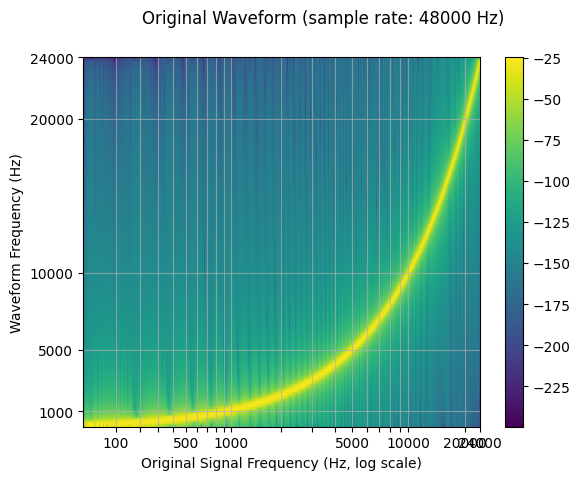

In [125]:
sample_rate = 48000
waveform = get_sine_sweep(sample_rate)

plot_sweep(waveform, sample_rate, title="Original Waveform")
Audio(waveform.numpy()[0], rate=sample_rate)

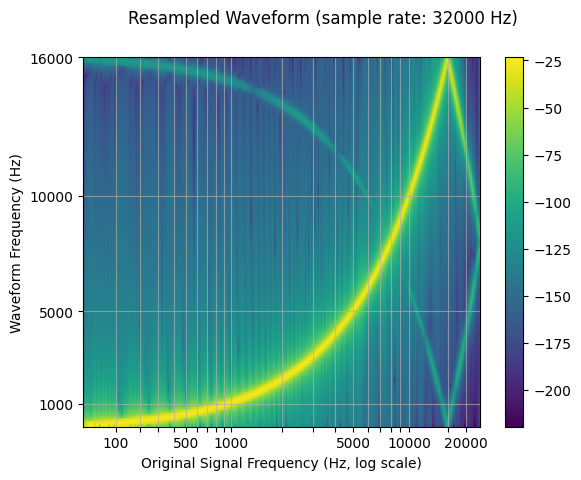

In [126]:
resample_rate = 32000 # 다운 샘플링
resampler = T.Resample(sample_rate, resample_rate, dtype=waveform.dtype)
resampled_waveform = resampler(waveform)

plot_sweep(resampled_waveform, resample_rate, title="Resampled Waveform")
Audio(resampled_waveform.numpy()[0], rate=resample_rate)

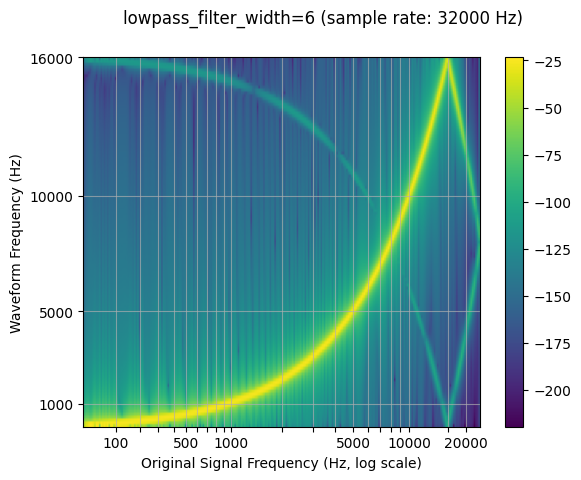

In [127]:
sample_rate = 48000
resample_rate = 32000

resampled_waveform = F.resample(waveform, sample_rate, resample_rate, lowpass_filter_width=6)
plot_sweep(resampled_waveform, resample_rate, title="lowpass_filter_width=6")

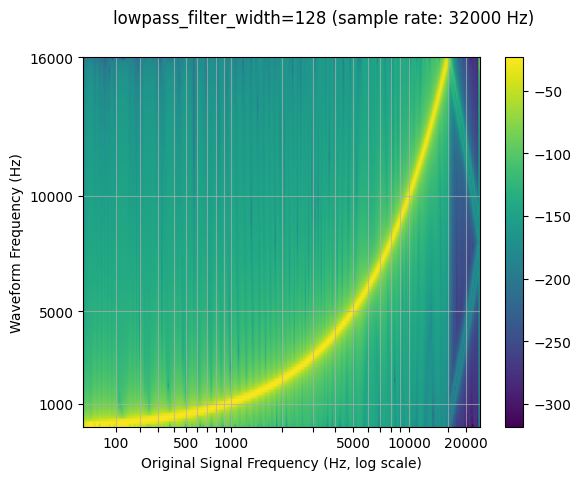

In [128]:
resampled_waveform = F.resample(waveform, sample_rate, resample_rate, lowpass_filter_width=128)
plot_sweep(resampled_waveform, resample_rate, title="lowpass_filter_width=128")

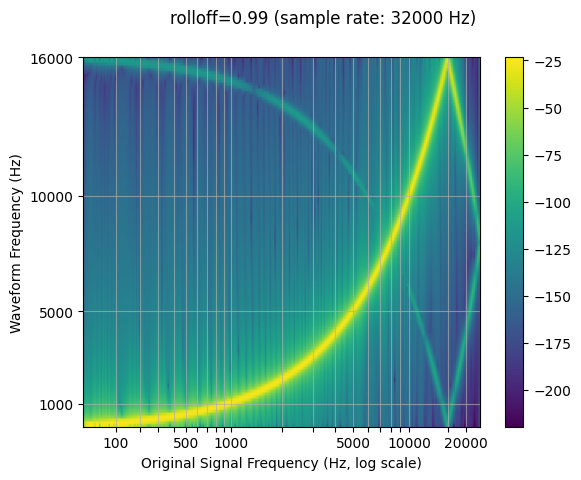

In [129]:
sample_rate = 48000
resample_rate = 32000

resampled_waveform = F.resample(waveform, sample_rate, resample_rate, rolloff=0.99)
plot_sweep(resampled_waveform, resample_rate, title="rolloff=0.99")

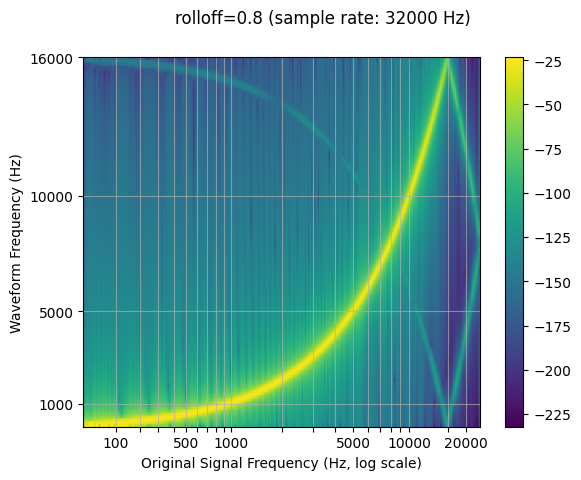

In [130]:
resampled_waveform = F.resample(waveform, sample_rate, resample_rate, rolloff=0.8)
plot_sweep(resampled_waveform, resample_rate, title="rolloff=0.8")

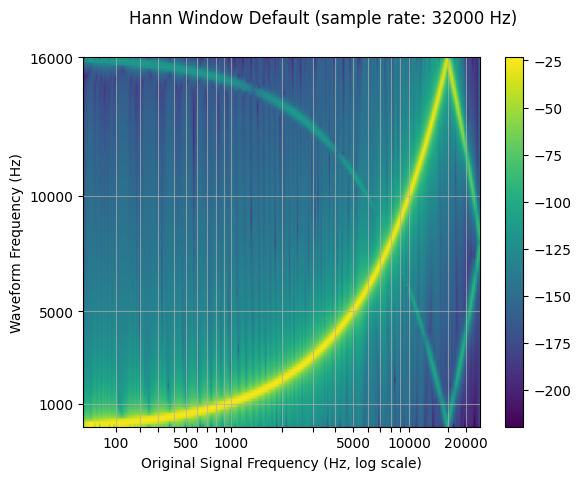

In [131]:
sample_rate = 48000
resample_rate = 32000

resampled_waveform = F.resample(waveform, sample_rate, resample_rate, resampling_method="sinc_interp_hann")
plot_sweep(resampled_waveform, resample_rate, title="Hann Window Default")

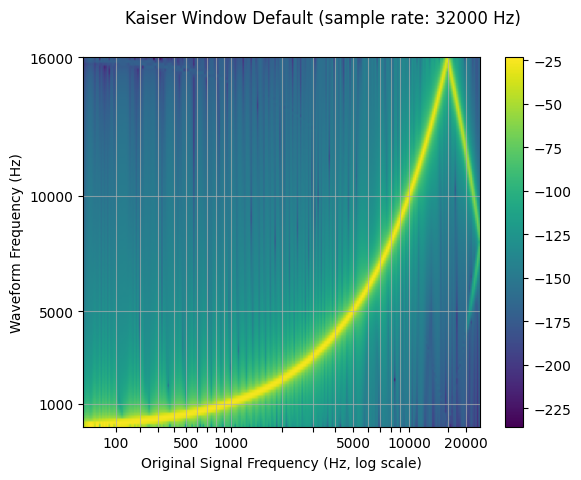

In [132]:
resampled_waveform = F.resample(waveform, sample_rate, resample_rate, resampling_method="sinc_interp_kaiser")
plot_sweep(resampled_waveform, resample_rate, title="Kaiser Window Default")

## 성능 벤치마킹

In [133]:
print(f"torchaudio: {torchaudio.__version__}")
print(f"librosa: {librosa.__version__}")
print(f"resampy: {resampy.__version__}")

torchaudio: 2.8.0+cu126
librosa: 0.11.0
resampy: 0.4.3


In [134]:
def benchmark_resample_functional(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=6,
    rolloff=0.99,
    resampling_method="sinc_interp_hann",
    beta=None,
    iters=5,
):
    return (
        timeit.timeit(
            stmt="""
torchaudio.functional.resample(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=lowpass_filter_width,
    rolloff=rolloff,
    resampling_method=resampling_method,
    beta=beta,
)
        """,
            setup="import torchaudio",
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

In [135]:
def benchmark_resample_transforms(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=6,
    rolloff=0.99,
    resampling_method="sinc_interp_hann",
    beta=None,
    iters=5,
):
    return (
        timeit.timeit(
            stmt="resampler(waveform)",
            setup="""
import torchaudio

resampler = torchaudio.transforms.Resample(
    sample_rate,
    resample_rate,
    lowpass_filter_width=lowpass_filter_width,
    rolloff=rolloff,
    resampling_method=resampling_method,
    dtype=waveform.dtype,
    beta=beta,
)
resampler.to(waveform.device)
        """,
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

In [136]:
def benchmark_resample_librosa(
    waveform,
    sample_rate,
    resample_rate,
    res_type=None,
    iters=5,
):
    waveform_np = waveform.squeeze().numpy()
    return (
        timeit.timeit(
            stmt="""
librosa.resample(
    waveform_np,
    orig_sr=sample_rate,
    target_sr=resample_rate,
    res_type=res_type,
)
        """,
            setup="import librosa",
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

In [137]:
def benchmark(sample_rate, resample_rate):
    times, rows = [], []
    waveform = get_sine_sweep(sample_rate).to(torch.float32)

    args = (waveform, sample_rate, resample_rate)

    # sinc 64 zero-crossings
    f_time = benchmark_resample_functional(*args, lowpass_filter_width=64)
    t_time = benchmark_resample_transforms(*args, lowpass_filter_width=64)
    times.append([None, f_time, t_time])
    rows.append("sinc (width 64)")

    # sinc 6 zero-crossings
    f_time = benchmark_resample_functional(*args, lowpass_filter_width=16)
    t_time = benchmark_resample_transforms(*args, lowpass_filter_width=16)
    times.append([None, f_time, t_time])
    rows.append("sinc (width 16)")

    # kaiser best
    kwargs = {
        "lowpass_filter_width": 64,
        "rolloff": 0.9475937167399596,
        "resampling_method": "sinc_interp_kaiser",
        "beta": 14.769656459379492,
    }
    lib_time = benchmark_resample_librosa(*args, res_type="kaiser_best")
    f_time = benchmark_resample_functional(*args, **kwargs)
    t_time = benchmark_resample_transforms(*args, **kwargs)
    times.append([lib_time, f_time, t_time])
    rows.append("kaiser_best")

    # kaiser fast
    kwargs = {
        "lowpass_filter_width": 16,
        "rolloff": 0.85,
        "resampling_method": "sinc_interp_kaiser",
        "beta": 8.555504641634386,
    }
    lib_time = benchmark_resample_librosa(*args, res_type="kaiser_fast")
    f_time = benchmark_resample_functional(*args, **kwargs)
    t_time = benchmark_resample_transforms(*args, **kwargs)
    times.append([lib_time, f_time, t_time])
    rows.append("kaiser_fast")

    df = pd.DataFrame(times, columns=["librosa", "functional", "transforms"], index=rows)
    return df

In [138]:
def plot(df):
    print(df.round(2))
    ax = df.plot(kind="bar")
    plt.ylabel("Time Elapsed [ms]")
    plt.xticks(rotation=0, fontsize=10)
    for cont, col, color in zip(ax.containers, df.columns, mcolors.TABLEAU_COLORS):
        label = ["N/A" if v != v else str(v) for v in df[col].round(2)]
        ax.bar_label(cont, labels=label, color=color, fontweight="bold", fontsize="x-small")

                 librosa  functional  transforms
sinc (width 64)      NaN        2.06        1.90
sinc (width 16)      NaN        2.53        1.12
kaiser_best       107.77        8.30        1.13
kaiser_fast        22.89        4.41        2.17


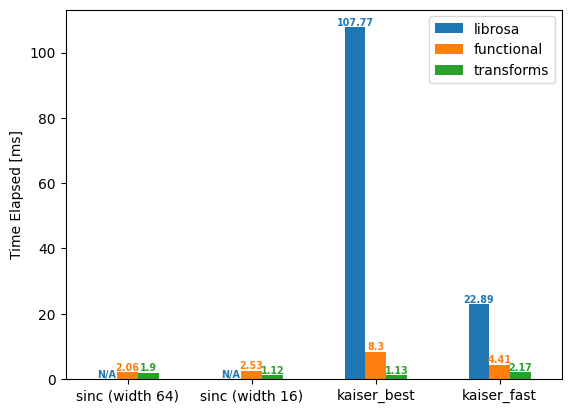

In [139]:
df = benchmark(48_000, 44_100)
plot(df)

                 librosa  functional  transforms
sinc (width 64)      NaN       22.51       18.25
sinc (width 16)      NaN        4.66        4.74
kaiser_best        45.72       15.10        7.79
kaiser_fast         9.23        3.92        2.98


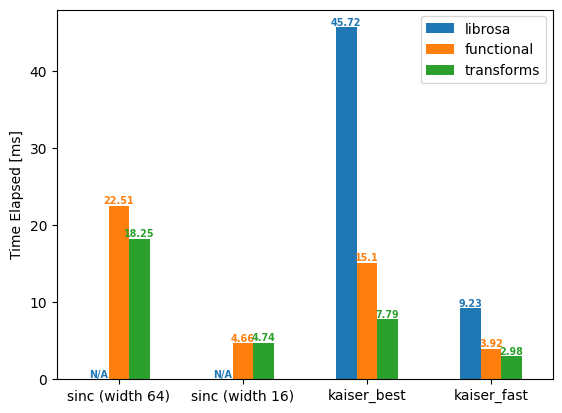

In [140]:
df = benchmark(16_000, 8_000)
plot(df)

                 librosa  functional  transforms
sinc (width 64)      NaN        4.17        3.85
sinc (width 16)      NaN        2.37        2.31
kaiser_best       136.43        7.34        1.07
kaiser_fast        27.83       20.28        1.71


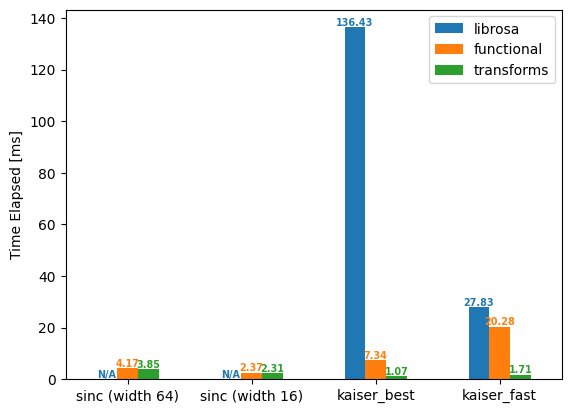

In [141]:
df = benchmark(44_100, 48_000)
plot(df)

                 librosa  functional  transforms
sinc (width 64)      NaN        3.03        2.15
sinc (width 16)      NaN        3.17        0.64
kaiser_best        30.73        1.48        0.90
kaiser_fast         6.52        0.76        0.41


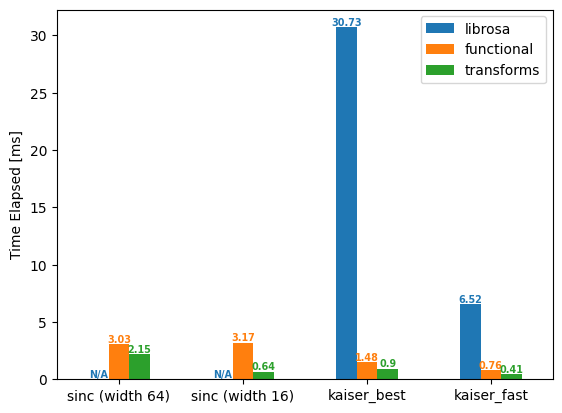

In [142]:
df = benchmark(8_000, 16_000)
plot(df)

# 1. sample audio dataset을 사용하여 waveform과 spectogram 출력

In [143]:
import os, glob
import torch, torchaudio
import matplotlib.pyplot as plt

DATA_DIR = "/content/LMS_sample_audio"
exts = ["*.wav", "*.flac", "*.mp3", "*.ogg", "*.m4a"]
files = sum((glob.glob(os.path.join(DATA_DIR, p)) for p in exts), [])

print(f"found {len(files)} files")
for i, f in enumerate(files[:5]):
    print(i, os.path.basename(f))

AUDIO_PATH = files[0]  # 필요하면 인덱스 바꿔 다른 파일 선택
AUDIO_PATH


found 4 files
0 095522039.m4a
1 095522041.m4a
2 095522042.m4a
3 095522040.m4a


'/content/LMS_sample_audio/095522039.m4a'

In [144]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

In [145]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

## 0 095522039.m4a

In [146]:
metadata = torchaudio.info(AUDIO_PATH)
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=174, num_channels=1, bits_per_sample=0, encoding=AAC)


/tmp/ipython-input-819693824.py:1: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  metadata = torchaudio.info(AUDIO_PATH)
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:20: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  s = torchau

waveform 출력

In [147]:
waveform, sample_rate = torchaudio.load(AUDIO_PATH)

/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

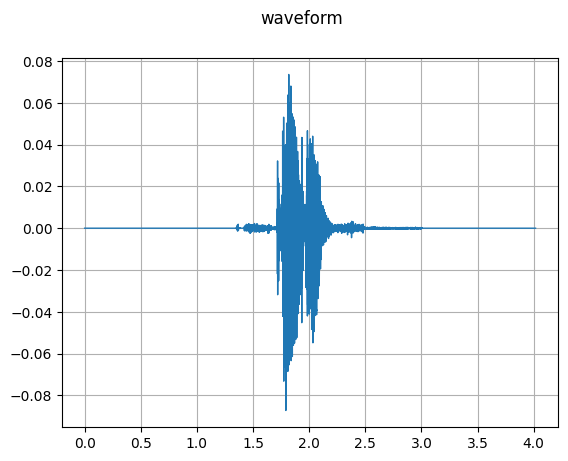

In [148]:
plot_waveform(waveform, sample_rate)

spectogram 출력

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


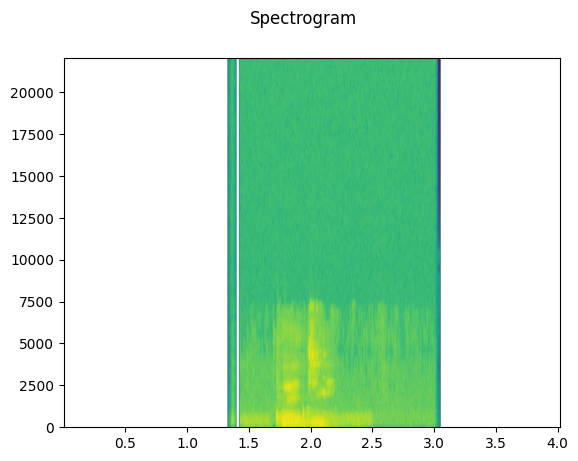

In [149]:
plot_specgram(waveform, sample_rate)

Audio(waveform.numpy()[0], rate=sample_rate)

## 095522041.m4a

In [150]:
AUDIO_PATH = files[1]
metadata = torchaudio.info(AUDIO_PATH)
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=174, num_channels=1, bits_per_sample=0, encoding=AAC)


/tmp/ipython-input-202127676.py:2: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  metadata = torchaudio.info(AUDIO_PATH)


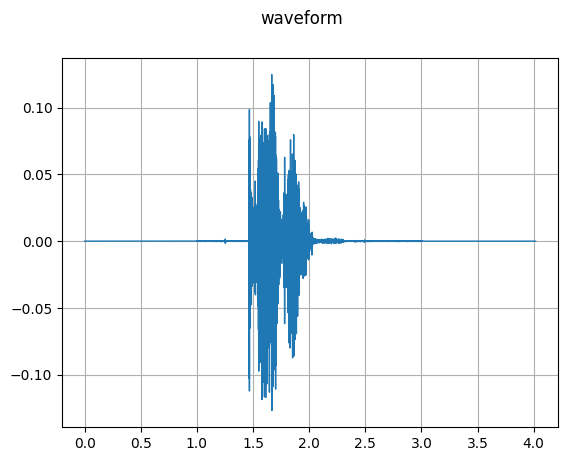

In [151]:
waveform, sample_rate = torchaudio.load(AUDIO_PATH)
plot_waveform(waveform, sample_rate)

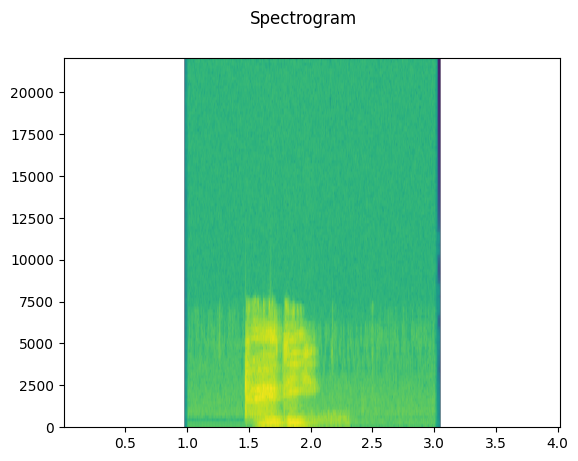

In [152]:
plot_specgram(waveform, sample_rate)

Audio(waveform.numpy()[0], rate=sample_rate)

In [153]:
AUDIO_PATH = files[2]
metadata = torchaudio.info(AUDIO_PATH)
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=174, num_channels=1, bits_per_sample=0, encoding=AAC)


/tmp/ipython-input-2240488537.py:2: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  metadata = torchaudio.info(AUDIO_PATH)


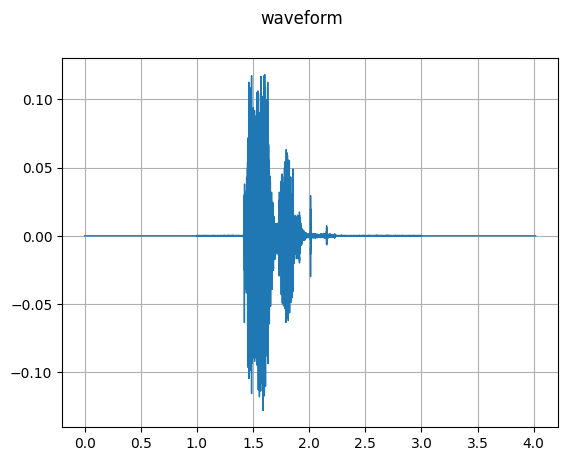

In [154]:
waveform, sample_rate = torchaudio.load(AUDIO_PATH)
plot_waveform(waveform, sample_rate)

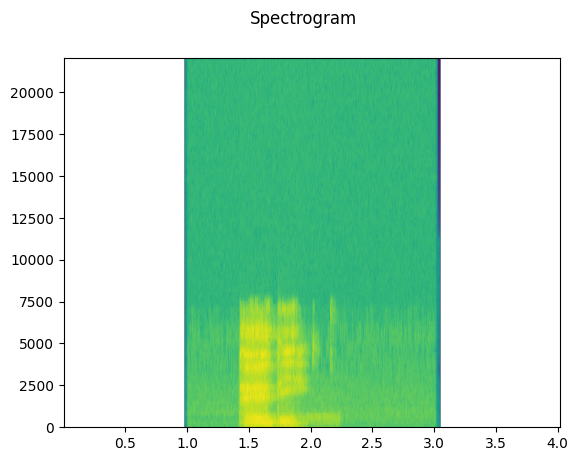

In [155]:
plot_specgram(waveform, sample_rate)

Audio(waveform.numpy()[0], rate=sample_rate)

## 샘플 4개의 waveform, spectogram 표시

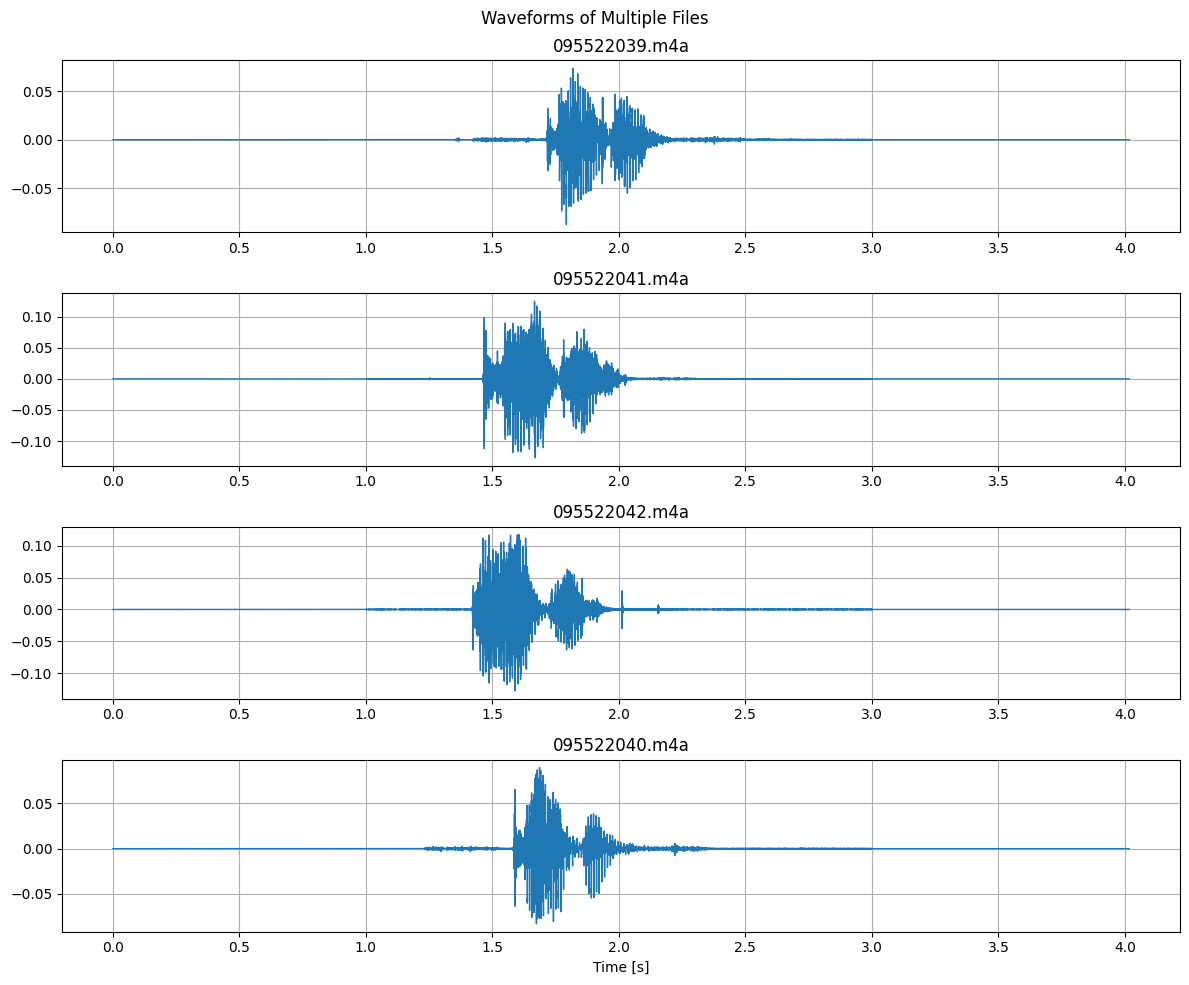

In [156]:
def plot_waveforms_for_files(file_paths):
    num_files = len(file_paths)
    fig, axes = plt.subplots(num_files, 1, figsize=(12, 2.5*num_files), sharex=False)

    if num_files == 1:
        axes = [axes]

    for i, path in enumerate(file_paths):
        waveform, sample_rate = torchaudio.load(path)
        wf = waveform.numpy()
        num_channels, num_frames = wf.shape
        time_axis = torch.arange(0, num_frames) / sample_rate

        # 첫 번째 채널만 플롯 (스테레오면 필요에 따라 수정)
        axes[i].plot(time_axis, wf[0], linewidth=1)
        axes[i].grid(True)
        axes[i].set_title(f"{os.path.basename(path)}")

    axes[-1].set_xlabel("Time [s]")
    fig.suptitle("Waveforms of Multiple Files")
    plt.tight_layout()
    plt.show()

# files 리스트에서 처음 4개 출력
plot_waveforms_for_files(files[:4])


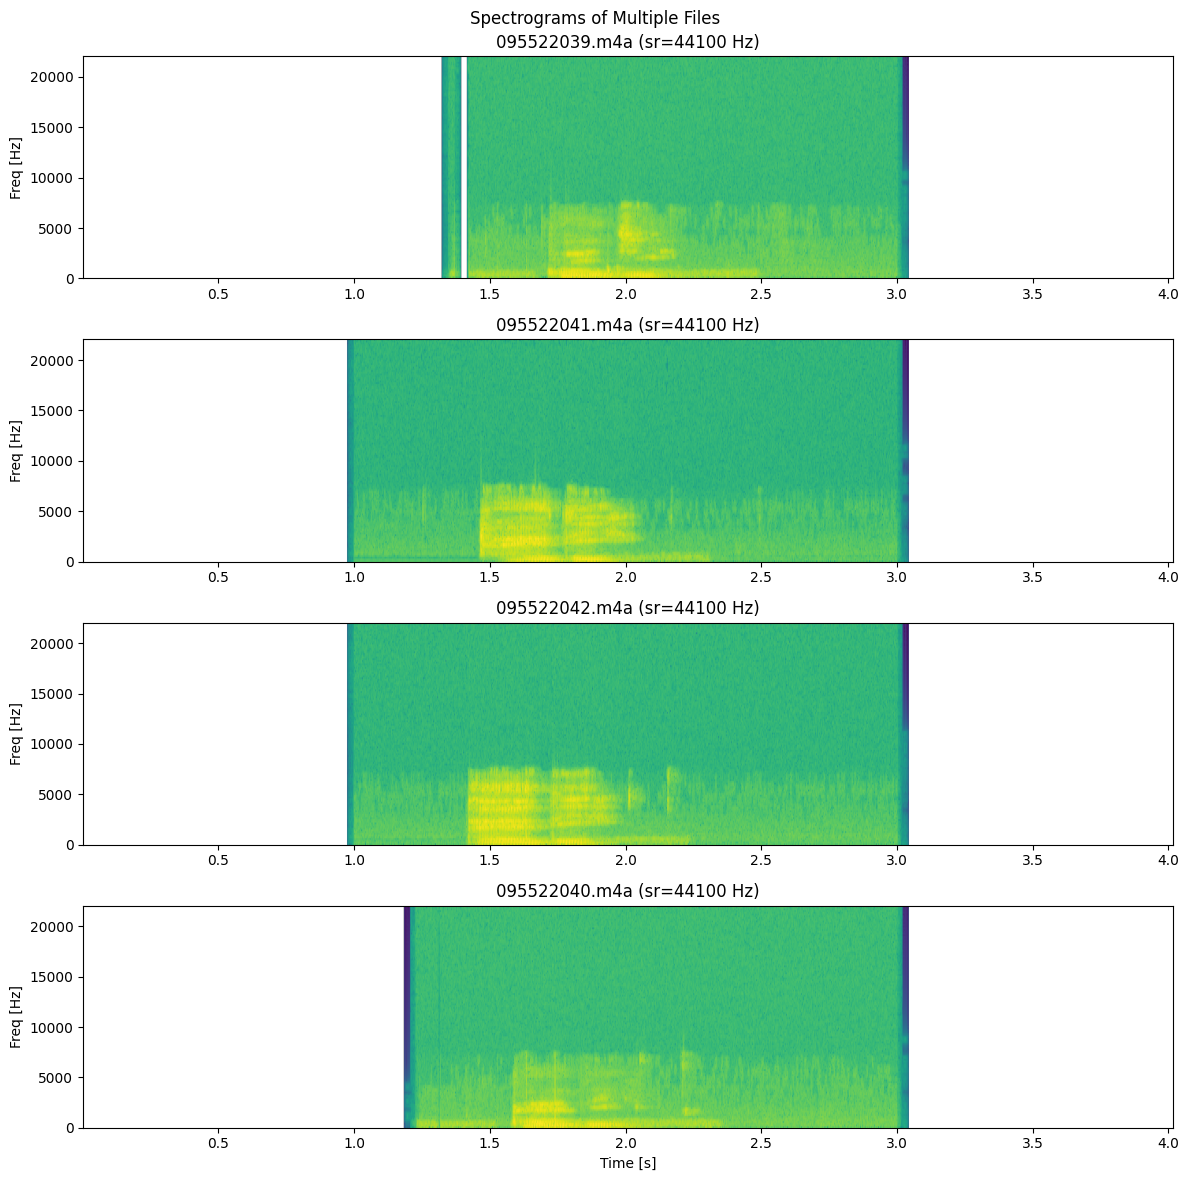

In [157]:
import torchaudio
import matplotlib.pyplot as plt

def plot_specgrams_for_files(file_paths):
    num_files = len(file_paths)
    fig, axes = plt.subplots(num_files, 1, figsize=(12, 3*num_files), sharex=False)

    if num_files == 1:
        axes = [axes]

    for i, path in enumerate(file_paths):
        waveform, sr = torchaudio.load(path)
        wf = waveform.numpy()
        num_channels, num_frames = wf.shape

        axes[i].specgram(wf[0], Fs=sr)   # 첫 번째 채널만 표시
        axes[i].set_title(f"{os.path.basename(path)} (sr={sr} Hz)")
        axes[i].set_ylabel("Freq [Hz]")

    axes[-1].set_xlabel("Time [s]")
    fig.suptitle("Spectrograms of Multiple Files")
    plt.tight_layout()
    plt.show()

# files 리스트에서 처음 4개 출력
plot_specgrams_for_files(files[:4])


# 2. Downsampling and Upsampling 수행

In [160]:
import os
import torch
import torchaudio
import matplotlib.pyplot as plt
from torchaudio.transforms import Resample
from IPython.display import Audio, display

def show_spec_and_audio_for_one(
    path,
    down_sr=8000,
    up_sr=56000,
    NFFT=1024,
    noverlap=512,
):
    """하나의 오디오 파일에 대해
       [Downsampled] → [Original] → [Upsampled]
       순서로 스펙트로그램과 오디오를 출력한다.
    """
    # 1) 원본 로드
    waveform, sr = torchaudio.load(path)     # [C, N]
    x = waveform[0].numpy()                  # 첫 채널만 사용
    title_base = f"{os.path.basename(path)}"

    # 2) 다운샘플 준비 (sr > down_sr 일 때만)
    do_down = sr > down_sr
    if do_down:
        down = Resample(orig_freq=sr, new_freq=down_sr)(waveform)
        x_down = down[0].numpy()

    # 3) 업샘플 준비 (sr < up_sr 일 때만)
    do_up = sr < up_sr
    if do_up:
        up = Resample(orig_freq=sr, new_freq=up_sr)(waveform)
        x_up = up[0].numpy()

    # 4) 그림 그리기 (위에서부터 Down → Original → Up)
    rows = 1 + int(do_down) + int(do_up)
    fig, axes = plt.subplots(rows, 1, figsize=(12, 3.2*rows), sharex=False)
    if rows == 1:
        axes = [axes]
    idx = 0

    if do_down:
        Pxx, freqs, bins, im = axes[idx].specgram(x_down, NFFT=NFFT, Fs=down_sr, noverlap=noverlap, scale='dB', mode='psd')
        axes[idx].set_title(f"[Downsampled] {title_base}  (sr={down_sr} Hz)")
        axes[idx].set_ylabel("Freq [Hz]")
        fig.colorbar(im, ax=axes[idx], label="dB")
        idx += 1

    Pxx, freqs, bins, im = axes[idx].specgram(x, NFFT=NFFT, Fs=sr, noverlap=noverlap, scale='dB', mode='psd')
    axes[idx].set_title(f"[Original] {title_base}  (sr={sr} Hz)")
    axes[idx].set_ylabel("Freq [Hz]")
    fig.colorbar(im, ax=axes[idx], label="dB")
    idx += 1

    if do_up:
        Pxx, freqs, bins, im = axes[idx].specgram(x_up, NFFT=NFFT, Fs=up_sr, noverlap=noverlap, scale='dB', mode='psd')
        axes[idx].set_title(f"[Upsampled] {title_base}  (sr={up_sr} Hz)")
        axes[idx].set_ylabel("Freq [Hz]")
        fig.colorbar(im, ax=axes[idx], label="dB")

    axes[-1].set_xlabel("Time [s]")
    fig.suptitle("Spectrogram comparison (matplotlib.specgram)")
    plt.tight_layout()
    plt.show()

    # 5) 오디오 플레이어도 같은 순서로 출력
    if do_down:
        print(f"Play [Downsampled {down_sr} Hz]")
        display(Audio(x_down, rate=down_sr))
    print(f"Play [Original {sr} Hz]")
    display(Audio(x, rate=sr))
    if do_up:
        print(f"Play [Upsampled {up_sr} Hz]")
        display(Audio(x_up, rate=up_sr))

    # 간단 요약
    print("\nSummary:")
    if do_down:
        print(f"  Down : {down.shape} @ {down_sr} Hz")
    else:
        print(f"  Down : skipped (orig sr={sr} ≤ {down_sr})")
    print(f"  Orig : {waveform.shape} @ {sr} Hz")
    if do_up:
        print(f"  Up   : {up.shape} @ {up_sr} Hz")
    else:
        print(f"  Up   : skipped (orig sr={sr} ≥ {up_sr})")


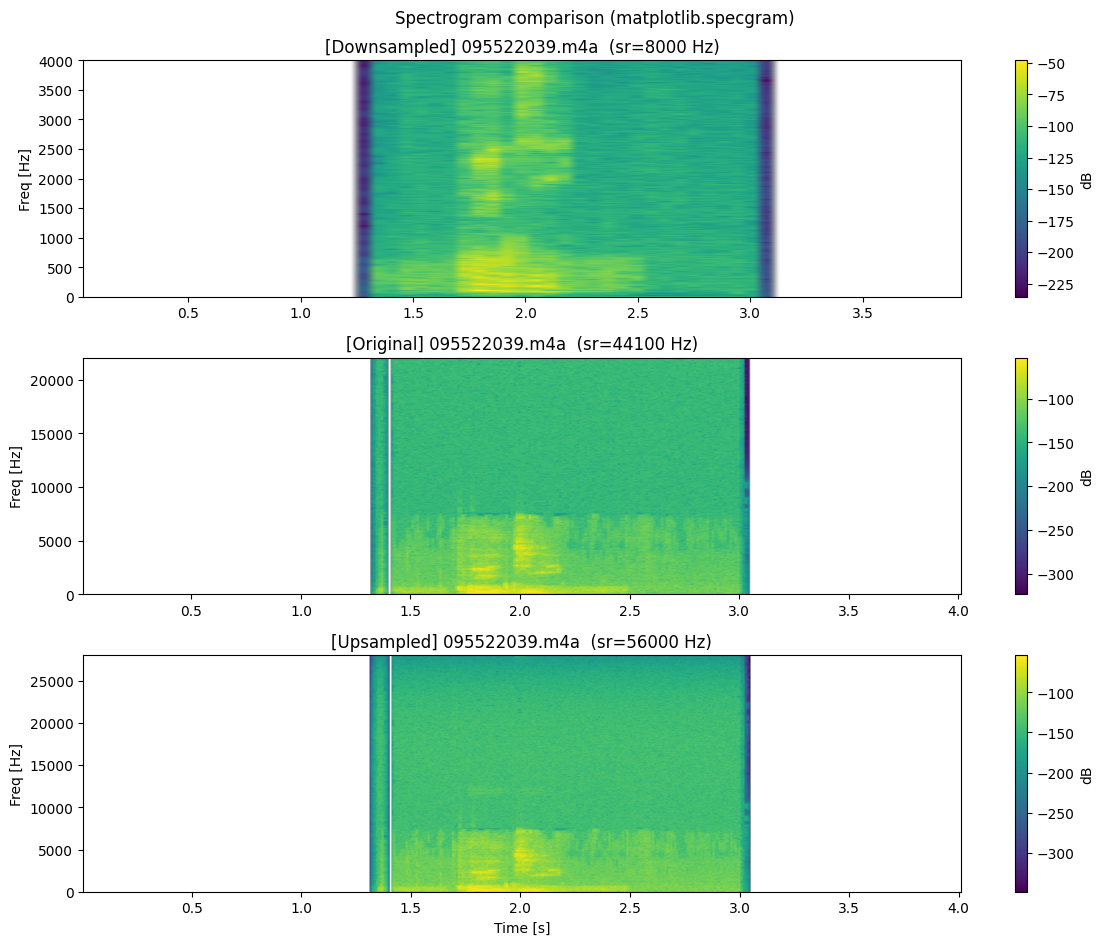

Play [Downsampled 8000 Hz]


Play [Original 44100 Hz]


Play [Upsampled 56000 Hz]



Summary:
  Down : torch.Size([1, 32137]) @ 8000 Hz
  Orig : torch.Size([1, 177152]) @ 44100 Hz
  Up   : torch.Size([1, 224955]) @ 56000 Hz


In [161]:
# files 리스트에서 원하는 하나를 골라 실행
show_spec_and_audio_for_one(files[0])   # 인덱스 바꿔가며 반복 실행